from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np

columns_list = ['income', 'debt_to_income_ratio', 'applicant_credit_score_type', 'co-applicant_credit_score_type', 'loan_amount', 'loan_purpose', 'loan_to_value_ratio', 'loan_term', 'preapproval', 'lien_status', 'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization', 'interest_only_payment', 'balloon_payment', 'property_value', 'construction_method', 'occupancy_type', 'county_code', 'census_tract', 'applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5', 'applicant_sex','applicant_age', 'action_taken']

#columns_list = ['loan_purpose', 'loan_amount', 'action_taken', 'applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5', 'applicant_sex', 'lien_status',


#  'income', 'debt_to_income_ratio', 'applicant_credit_score_type', 'co-applicant_credit_score_type', 'loan_amount', 'loan_type', 'loan_purpose', 'loan_to_value_ratio', 'interest_rate', 'rate_spread', 'loan_term', 'preapproval', 'lien_status', 'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization', 'interest_only_payment', 'balloon_payment', 'property_value', 'construction_method', 'occupancy_type', 'county_code', 'census_tract', 'applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5', 'applicant_sex', 'action_taken']


int_types = ['applicant_ethnicity-1',
       'applicant_ethnicity-2', 'applicant_ethnicity-3',
       'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1',
       'applicant_race-2', 'applicant_race-3', 'applicant_race-4',
       'applicant_race-5', 'applicant_sex', 'action_taken']
float_types=['loan_amount','loan_to_value_ratio', 'interest_rate', 'rate_spread', 'income', 'debt_to_income_ratio', 'loan_to_value_ratio']

object_types=[]

data = pd.read_csv("state_CA.csv", usecols= columns_list)



<ipython-input-142-9cb36043a649>:21: DtypeWarning: Columns (22,31,32,33,38,46,77) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/state_CA.csv", usecols= columns_list)


In [ ]:
len(columns_list)

33

In [ ]:
data.columns

Index(['county_code', 'census_tract', 'action_taken', 'preapproval',
       'loan_purpose', 'lien_status', 'loan_amount', 'loan_to_value_ratio',
       'loan_term', 'prepayment_penalty_term', 'intro_rate_period',
       'negative_amortization', 'interest_only_payment', 'balloon_payment',
       'property_value', 'construction_method', 'occupancy_type', 'income',
       'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_ethnicity-1',
       'applicant_ethnicity-2', 'applicant_ethnicity-3',
       'applicant_ethnicity-4', 'applicant_ethnicity-5', 'applicant_race-1',
       'applicant_race-2', 'applicant_race-3', 'applicant_race-4',
       'applicant_race-5', 'applicant_sex', 'applicant_age'],
      dtype='object')

In [ ]:
columns_to_check_for_na = ['county_code', 'census_tract', 'preapproval',
       'loan_purpose', 'lien_status', 'loan_amount', 'loan_to_value_ratio', 'loan_term', 'prepayment_penalty_term',
       'intro_rate_period', 'negative_amortization', 'interest_only_payment',
       'balloon_payment', 'property_value', 'construction_method',
       'occupancy_type', 'income', 'debt_to_income_ratio',
       'applicant_credit_score_type', 'co-applicant_credit_score_type',
       'applicant_ethnicity-1', 'applicant_race-1', 'applicant_sex']

data= data.dropna(subset=columns_to_check_for_na)


In [ ]:
data = data[data!= 'Exempt']
data = data[data!= '1111']
data = data[data!= 1111]
data = data[data!= '8888']
data = data[data!= 8888]

In [ ]:
data = data[data!= 'NaN']
data = data[data!= 'nan']

In [ ]:
# Update action_taken values
data['action_taken'] = data['action_taken'].replace({1: 1, 2: 1, 3: 0, 7: 0})

# Drop rows with action_taken values of 4, 5, 6, or 8
data = data[~data['action_taken'].isin([4, 5, 6, 8])]
data = data[~data['applicant_ethnicity-1'].isin([3, 4])]
data = data[~data['applicant_sex'].isin([3, 4, 6])]



In [ ]:
action_taken_counts = data['action_taken'].value_counts()
print(action_taken_counts)

action_taken
0    32992
1    31881
Name: count, dtype: int64


In [ ]:
data['debt_to_income_ratio']= data['debt_to_income_ratio'].replace({
    '<20%': '0',
    '>60%': '60',

    '30%-<36%': '30',
    '20%-<30%': '20',
    '50%-60%': '50'
})

num_elements_per_range = min(data['debt_to_income_ratio'].value_counts())



In [ ]:

replacement_ranges = {
    '37': [37,38,39,40,41,42],
    '43': [43,44,45,46,47,48,49],
}

for key,value in replacement_ranges.items():
  selected_rows= data['debt_to_income_ratio'].astype(float).between(min(value), max(value))
  data.loc[selected_rows, 'debt_to_income_ratio'] = key



In [ ]:
for i in range(1, 6):
        race_col = f'applicant_race-{i}'
        data[race_col] = data[race_col].replace({1: 1, 2: 2, 21:2, 22:2, 23:2, 24:2, 25:2, 26:2, 27:2, 3: 3, 4: 4, 41:4, 42: 4, 43: 4, 44: 4})

for i in range(1, 6):
        race_col = f'applicant_ethnicity-{i}'
        data[race_col] = data[race_col].replace({1: 1, 2: 0, 11:1, 12:1, 13:1, 14:1})

data['applicant_ethnicity'] = (data[['applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5']].sum(axis=1) >= 1).astype(int) + 1
data.drop(['applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4', 'applicant_ethnicity-5'],  axis=1, inplace=True)


In [ ]:
data

,county_code,census_tract,action_taken,preapproval,loan_purpose,lien_status,loan_amount,loan_to_value_ratio,loan_term,prepayment_penalty_term,...,applicant_credit_score_type,co-applicant_credit_score_type,applicant_race-1,applicant_race-2,applicant_race-3,applicant_race-4,applicant_race-5,applicant_sex,applicant_age,applicant_ethnicity
54108,6085.0,6.085504e+09,1,2,1,1,1085000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1,35-44,1
54116,6059.0,6.059063e+09,1,2,1,1,1955000.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,35-44,1
54131,6037.0,6.037262e+09,1,2,1,1,3045000.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,1,NaN,1
54139,6059.0,6.059063e+09,1,2,1,1,2625000.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,1,NaN,1
64997,6085.0,6.085508e+09,1,2,1,1,1725000.0,65.0,360.0,18.0,...,9.0,10.0,2.0,NaN,NaN,NaN,NaN,1,45-54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547658,6071.0,6.071002e+09,1,2,1,1,395000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1,25-34,1
1547660,6059.0,6.059052e+09,1,2,1,1,1025000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,2,25-34,1
1547661,6037.0,6.037403e+09,1,2,1,1,545000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1,25-34,1
1547662,6037.0,6.037431e+09,1,2,32,1,875000.0,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,2,45-54,1


In [ ]:
def combine_race(row):
    races = []
    for i in range(1, 6):
        race_col = f'applicant_race-{i}'
        if pd.notna(row[race_col]) and row[race_col] in [1,2,3,4,5]:
            races.append(row[race_col])
    return races


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

app_race = data.apply(combine_race, axis=1)
mlb = MultiLabelBinarizer()
race_binarized = mlb.fit_transform(app_race)
data=data.drop(columns=['applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4', 'applicant_race-5'])

In [ ]:
data.columns

Index(['county_code', 'census_tract', 'action_taken', 'preapproval',
       'loan_purpose', 'lien_status', 'loan_amount', 'loan_to_value_ratio',
       'loan_term', 'prepayment_penalty_term', 'intro_rate_period',
       'negative_amortization', 'interest_only_payment', 'balloon_payment',
       'property_value', 'construction_method', 'occupancy_type', 'income',
       'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_sex', 'applicant_age',
       'applicant_ethnicity'],
      dtype='object')

In [ ]:
race_binarized

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [ ]:
import numpy as np
race_sums = race_binarized.sum(axis=1)
data['Mixed'] = (race_sums > 1).astype(int)

data = data[race_sums > 0]
race_binarized = race_binarized[race_sums > 0]

In [ ]:
for i, race in enumerate(['AI or AN', 'Asian', 'Black or AA', 'NH or PI', 'White']):
    data[f'{race}'] = race_binarized[:, i]

In [ ]:
data['race'] = np.where(np.any(race_binarized[:,:4], axis=1),1,0)
race_columns = ['AI or AN', 'Asian', 'Black or AA', 'NH or PI', 'White']
result_a =data[race_columns].sum(axis=1)<1
result_b =data[race_columns].sum(axis=1)>1
#off_rows = data[result_a]
#print(off_rows)
on_rows = data[result_b]
print(on_rows)
for i, race in enumerate(['AI or AN_me', 'Asian_me', 'Black or AA_me', 'NH or PI_me', 'White_me']):
    data[f'{race}'] = race_binarized[:, i]
race_columns_me = ['AI or AN_me', 'Asian_me', 'Black or AA_me', 'NH or PI_me', 'White_me']
data.loc[data['Mixed'] == 1, race_columns_me] = 0
print(data[race_columns_me])

         county_code  census_tract  action_taken  preapproval  loan_purpose  \
126918        6061.0  6.061021e+09             1            2             4   
127123        6067.0  6.067006e+09             0            2             2   
127549        6067.0  6.067009e+09             1            2             2   
127567        6067.0  6.067004e+09             0            2             4   
127581        6113.0  6.113011e+09             0            2             2   
...              ...           ...           ...          ...           ...   
1525451       6037.0  6.037462e+09             1            2             4   
1525965       6037.0  6.037263e+09             1            2             4   
1526350       6037.0  6.037277e+09             1            2             2   
1527221       6037.0  6.037464e+09             0            2             2   
1527562       6111.0  6.111007e+09             0            2            32   

         lien_status  loan_amount loan_to_value_rat

In [ ]:
print(data[race_columns_me], data[race_columns])

         AI or AN_me  Asian_me  Black or AA_me  NH or PI_me  White_me
54108              0         1               0            0         0
54116              0         0               0            0         1
54131              0         0               0            0         1
54139              0         0               0            0         1
64997              0         1               0            0         0
...              ...       ...             ...          ...       ...
1547658            0         1               0            0         0
1547660            0         1               0            0         0
1547661            0         1               0            0         0
1547662            0         1               0            0         0
1547663            0         1               0            0         0

[58602 rows x 5 columns]          AI or AN  Asian  Black or AA  NH or PI  White
54108           0      1            0         0      0
54116           0      0

In [ ]:
data.dropna(inplace=True)

In [ ]:
data['prepayment_penalty_term'] = data['prepayment_penalty_term'].astype(int)
data['intro_rate_period'] = data['intro_rate_period'].astype(int)

In [ ]:
x = 0
for column in data.columns:
  distinct_values = data[column].nunique()
  print(f"Column '{column}' has {distinct_values} distinct values", x)
  x+=1

Column 'county_code' has 57 distinct values 0
Column 'census_tract' has 8063 distinct values 1
Column 'action_taken' has 2 distinct values 2
Column 'preapproval' has 2 distinct values 3
Column 'loan_purpose' has 6 distinct values 4
Column 'lien_status' has 2 distinct values 5
Column 'loan_amount' has 186 distinct values 6
Column 'loan_to_value_ratio' has 26126 distinct values 7
Column 'loan_term' has 13 distinct values 8
Column 'prepayment_penalty_term' has 7 distinct values 9
Column 'intro_rate_period' has 9 distinct values 10
Column 'negative_amortization' has 2 distinct values 11
Column 'interest_only_payment' has 2 distinct values 12
Column 'balloon_payment' has 2 distinct values 13
Column 'property_value' has 1058 distinct values 14
Column 'construction_method' has 2 distinct values 15
Column 'occupancy_type' has 3 distinct values 16
Column 'income' has 1343 distinct values 17
Column 'debt_to_income_ratio' has 8 distinct values 18
Column 'applicant_credit_score_type' has 8 distinc

In [ ]:
import numpy as np
categorical_features = []
dicts = {}
x = 0
for column in data.columns:
  feature_dict= {}
  distinct_values = data[column].nunique()
  if column == 'action_taken' or column == 'Asian' or column == 'Black or AA' or column == 'NH or PI' or column == 'White':
    continue
  if column == 'AI or AN':
    feature_dict['AI or AN'] = x
    x+=1
    feature_dict['Asian'] = x
    x+=1
    feature_dict['Black or AA'] = x
    x+=1
    feature_dict['NH or PI'] = x
    x+=1
    feature_dict['White'] = x
    x+=1
    dicts['race'] = feature_dict
    continue
  elif distinct_values < 50 and distinct_values>2:
    categorical_features.append(column)
    distinct_ops = data[column].unique()
    for y in distinct_ops:
      feature_dict[y] = x
      x+=1
  elif distinct_values == 2:
    feature_dict['binary'] = x
    x+=1
  else:
    feature_dict['continuous'] = x
    x+=1
  dicts[column]=feature_dict

In [ ]:
print(dicts)

{'county_code': {'continuous': 0}, 'census_tract': {'continuous': 1}, 'preapproval': {'binary': 2}, 'loan_purpose': {1: 3, 31: 4, 2: 5, 32: 6, 4: 7, 5: 8}, 'lien_status': {'binary': 9}, 'loan_amount': {'continuous': 10}, 'loan_to_value_ratio': {'continuous': 11}, 'loan_term': {360.0: 12, 240.0: 13, '360': 14, '240': 15, '300': 16, '180': 17, 180.0: 18, 300.0: 19, '60': 20, '120': 21, '480': 22, '84': 23, '420': 24}, 'prepayment_penalty_term': {18: 25, 36: 26, 0: 27, 24: 28, 12: 29, 6: 30, 2: 31}, 'intro_rate_period': {60: 32, 1: 33, 84: 34, 299: 35, 120: 36, 3: 37, 12: 38, 6: 39, 9: 40}, 'negative_amortization': {'binary': 41}, 'interest_only_payment': {'binary': 42}, 'balloon_payment': {'binary': 43}, 'property_value': {'continuous': 44}, 'construction_method': {'binary': 45}, 'occupancy_type': {3: 46, 1: 47, 2: 48}, 'income': {'continuous': 49}, 'debt_to_income_ratio': {'50': 50, '30': 51, '37': 52, '43': 53, '60': 54, '20': 55, '0': 56, '36': 57}, 'applicant_credit_score_type': {9.0

In [ ]:
# = ['occupancy_type', 'preapproval','lien_status', 'balloon_payment', 'negative_amortization', 'interest_only_payment', 'debt_to_income_ratio','applicant_age', 'loan_purpose', 'applicant_credit_score_type', 'co-applicant_credit_score_type']

data_encoded = pd.get_dummies(data, columns=categorical_features)

In [ ]:
data = data_encoded

In [ ]:
data.columns

Index(['county_code', 'census_tract', 'action_taken', 'preapproval',
       'lien_status', 'loan_amount', 'loan_to_value_ratio',
       'negative_amortization', 'interest_only_payment', 'balloon_payment',
       'property_value', 'construction_method', 'income', 'applicant_sex',
       'applicant_ethnicity', 'Mixed', 'AI or AN', 'Asian', 'Black or AA',
       'NH or PI', 'White', 'race', 'AI or AN_me', 'Asian_me',
       'Black or AA_me', 'NH or PI_me', 'White_me', 'loan_purpose_1',
       'loan_purpose_2', 'loan_purpose_4', 'loan_purpose_5', 'loan_purpose_31',
       'loan_purpose_32', 'loan_term_180.0', 'loan_term_240.0',
       'loan_term_300.0', 'loan_term_360.0', 'loan_term_120', 'loan_term_180',
       'loan_term_240', 'loan_term_300', 'loan_term_360', 'loan_term_420',
       'loan_term_480', 'loan_term_60', 'loan_term_84',
       'prepayment_penalty_term_0', 'prepayment_penalty_term_2',
       'prepayment_penalty_term_6', 'prepayment_penalty_term_12',
       'prepayment_penalty_

In [ ]:

# Separate the majority and minority classes
df_majority = data[data.action_taken == 0]
df_minority = data[data.action_taken == 1]

# Undersample the majority class without replacement
df_majority_undersampled = df_majority.sample(n=len(df_minority), random_state=42)

# Combine minority class with undersampled majority class
df_undersampled = pd.concat([df_minority, df_majority_undersampled])

# Shuffle the dataset to prevent the model from learning any order
df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
 data = df_undersampled

In [ ]:
action_taken_counts = data['action_taken'].value_counts()
print(action_taken_counts)

action_taken
1    26720
0    26720
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'action_taken' is the target variable


columns_with_na = data.columns[data.isna().any()].tolist()
X = data.drop(['action_taken','AI or AN_me', 'Asian_me', 'Black or AA_me', 'NH or PI_me', 'White_me', 'Mixed', 'race'], axis=1)
y = data['action_taken']
me_cols = data[['AI or AN_me', 'Asian_me', 'Black or AA_me', 'NH or PI_me', 'White_me', 'Mixed']]
bin_cols = data['race']
# Split data into training and testing sets
X_train, X_test, y_train, y_test, me_cols_train, me_cols_test, bin_cols_train, bin_cols_test = train_test_split(X, y, me_cols, bin_cols, test_size=0.2, random_state=42)

In [ ]:
columns_with_na

[]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Create a pipeline with preprocessing and model
logistic_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=3000))

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_model.predict(X_test)

# Calculate the accuracy
logistic_accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {logistic_accuracy:.4f}')

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])

Logistic Regression Accuracy: 0.7867


In [ ]:
print(report)

              precision    recall  f1-score   support

     Class 0       0.83      0.72      0.77      5315
     Class 1       0.76      0.85      0.80      5373

    accuracy                           0.79     10688
   macro avg       0.79      0.79      0.79     10688
weighted avg       0.79      0.79      0.79     10688



In [ ]:
from sklearn.metrics import precision_score, f1_score, recall_score
print(precision_score(y_test, y_pred), f1_score(y_test, y_pred), recall_score(y_test, y_pred))

0.7558312655086848 0.8003152916447713 0.8503629257398102


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
rf_pred = rf_model.predict(X_test)

# Calculate the accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy}')

# Generate and print the classification report
rf_report = classification_report(y_test, rf_pred, target_names=['Class 0', 'Class 1'])
print(rf_report)

Random Forest Accuracy: 0.8313997005988024
              precision    recall  f1-score   support

     Class 0       0.86      0.79      0.82      5315
     Class 1       0.81      0.87      0.84      5373

    accuracy                           0.83     10688
   macro avg       0.83      0.83      0.83     10688
weighted avg       0.83      0.83      0.83     10688



In [ ]:
print(precision_score(y_test, rf_pred), f1_score(y_test, rf_pred), recall_score(y_test, rf_pred))

0.8097137901127494 0.8382115281019932 0.868788386376326


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with preprocessing and the MLP model
# StandardScaler is used to scale the data for better performance of the MLP
mlp_model = make_pipeline(StandardScaler(), MLPClassifier(max_iter=1000,random_state=42, solver='sgd'))


# Fit the model on the training data
mlp_model.fit(X_train, y_train)

# Predict on the test data
mlp_pred = mlp_model.predict(X_test)

# Calculate the accuracy
mlp_accuracy = accuracy_score(y_test, mlp_pred)
print(f'MLP Accuracy: {mlp_accuracy}')

# Generate and print the classification report
mlp_report = classification_report(y_test, mlp_pred, target_names=['Class 0', 'Class 1'])
print(mlp_report)


MLP Accuracy: 0.8135291916167665
              precision    recall  f1-score   support

     Class 0       0.83      0.78      0.81      5315
     Class 1       0.80      0.85      0.82      5373

    accuracy                           0.81     10688
   macro avg       0.81      0.81      0.81     10688
weighted avg       0.81      0.81      0.81     10688



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print(precision_score(y_test, mlp_pred), f1_score(y_test, mlp_pred), recall_score(y_test, mlp_pred))

0.7961794602173151 0.8201101182417185 0.8455239158756747


In [ ]:
coefficients = logistic_model.named_steps['logisticregression'].coef_[0]
feature_names = X_train.columns
feature_coefficients = dict(zip(feature_names, coefficients))
sorted_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)
for feature, coefficient in sorted_features:
    print(feature, coefficient)


debt_to_income_ratio_60 -1.7349687717363131
loan_term_180.0 0.879550813688456
debt_to_income_ratio_43 0.6234575858754285
debt_to_income_ratio_37 0.6142558423956593
loan_to_value_ratio -0.5518750513480809
loan_term_300 -0.4141725597219719
debt_to_income_ratio_30 0.40806960508990425
debt_to_income_ratio_20 0.3120538090141395
applicant_credit_score_type_9.0 -0.2768705860595469
debt_to_income_ratio_50 -0.27659088392544146
prepayment_penalty_term_12 0.2726490051769512
loan_amount 0.26150724276274917
applicant_credit_score_type_1.0 0.2602343512547832
prepayment_penalty_term_2 -0.24573693683760198
loan_term_180 0.24515300060461612
intro_rate_period_1 -0.23444318404451137
lien_status 0.21684627632712877
debt_to_income_ratio_36 0.21550827896501026
prepayment_penalty_term_24 0.2140943349938007
applicant_ethnicity -0.20456730429814107
intro_rate_period_3 0.18965885435107455
applicant_credit_score_type_2.0 0.18628648461745143
intro_rate_period_6 0.18203812631994348
loan_term_360.0 -0.1799624538550

Logistic


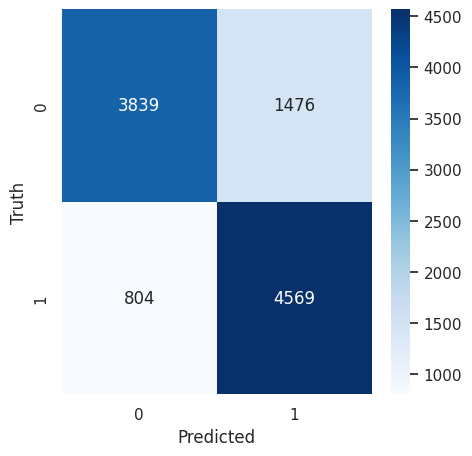


Random Forest


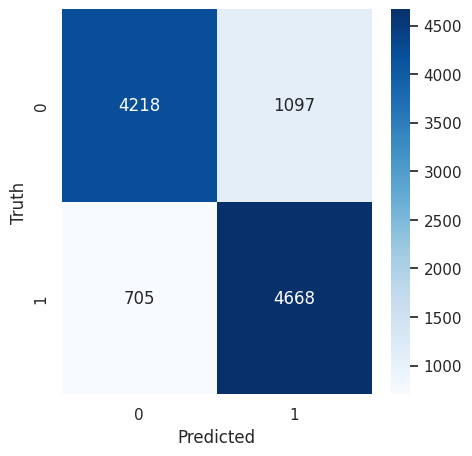


MLP


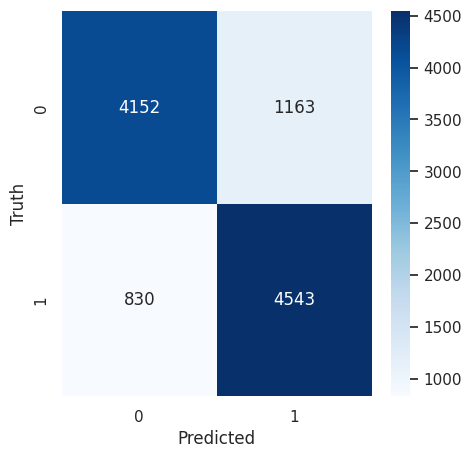

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


print("Logistic")
lg_cm = confusion_matrix(y_test, y_pred)

rf_cm =confusion_matrix(y_test, rf_pred)

mlp_cm = confusion_matrix(y_test, mlp_pred)

plt.figure(figsize=(5,5))
sns.heatmap(lg_cm, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

print("\nRandom Forest")
plt.figure(figsize=(5,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

print("\nMLP")
plt.figure(figsize=(5,5))
sns.heatmap(mlp_cm, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
!pip install holisticai[all]

In [ ]:
#DATA ANALYSIS FOR EQUALIZED ODDS
from holisticai.datasets import load_dataset
from holisticai.bias.plots import group_pie_plot

<Axes: >

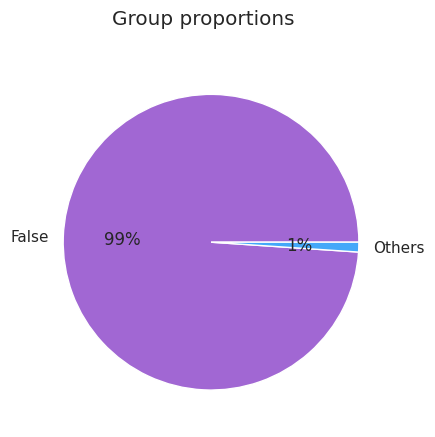

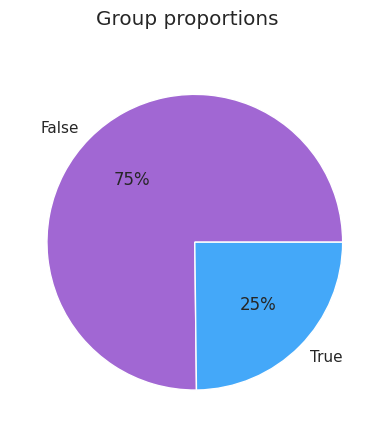

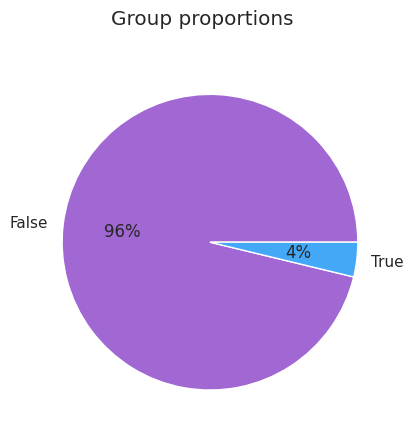

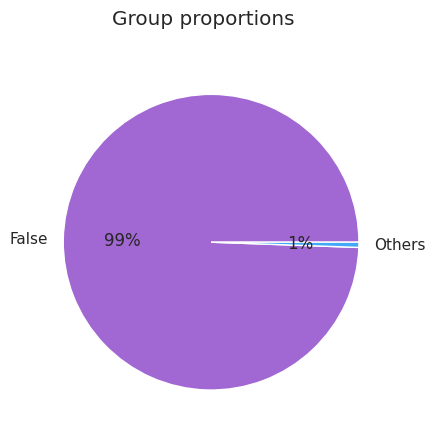

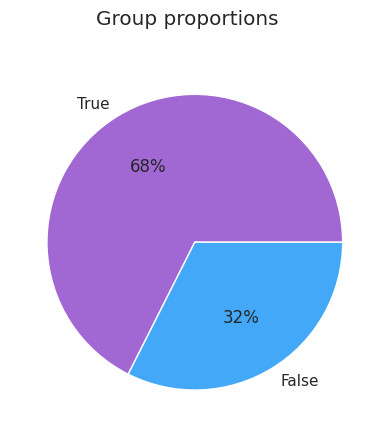

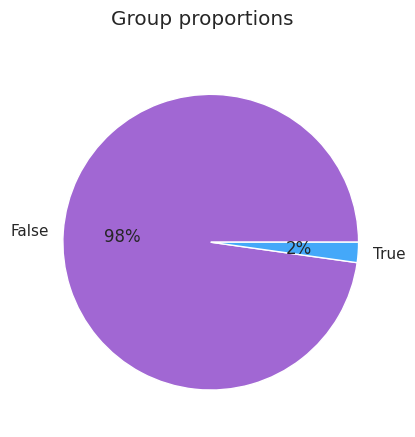

In [ ]:
group_ai_an = data['AI or AN_me'].astype(bool)
group_asian = data['Asian_me'].astype(bool)
group_black_aa = data['Black or AA_me'].astype(bool)
group_nh_pi = data['NH or PI_me'].astype(bool)
group_white = data['White_me'].astype(bool)
group_mixed = data['Mixed'].astype(bool)

group_pie_plot(group_ai_an)
group_pie_plot(group_asian)
group_pie_plot(group_black_aa)
group_pie_plot(group_nh_pi)
group_pie_plot(group_white)
group_pie_plot(group_mixed)

In [ ]:
def group_success_rate(g, y):
  success_rate = y[g == 1].sum() / g.sum()  # success rate group_a
  return success_rate

In [ ]:
def statistical_parity_multigroup(group_labels, y_pred):
    success_rates = {}
    for i, group in enumerate(group_labels):

        success_rates[race_columns_me[i]] = group_success_rate(group, y_pred)

    return success_rates

In [ ]:
from sklearn.metrics import confusion_matrix
def tpr_multigroup(group_labels, y_pred, y_test, me_cols_test):
    tpr_dict = {}

    for group in group_labels:
        me_cols_test = me_cols_test.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)
        filtered_indices = me_cols_test[me_cols_test[group]==1].index
        group_y_test = y_test[filtered_indices]
        group_y_pred = y_pred[filtered_indices]

        cm = confusion_matrix(group_y_test, group_y_pred, labels=[1, 0])

        if cm.shape == (2, 2):
            TP = cm[0, 0]
            FN = cm[1, 0]
            tpr = TP / (TP + FN) if (TP + FN) > 0 else 0
            tpr_dict[group] = tpr
        else:
            tpr_dict[group] = 0

    return tpr_dict

def fpr_multigroup(group_labels, y_pred, y_test, me_cols_test):
    fpr_dict = {}

    for group in group_labels:
        me_cols_test = me_cols_test.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)
        filtered_indices = me_cols_test[me_cols_test[group]==1].index
        group_y_test = y_test[filtered_indices]
        group_y_pred = y_pred[filtered_indices]

        cm = confusion_matrix(group_y_test, group_y_pred, labels=[1, 0])
        if cm.shape == (2, 2):
            FP = cm[0, 1]
            TN = cm[0, 0]
            fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
            fpr_dict[group] = fpr
        else:
            fpr_dict[group] = 0

    return fpr_dict


In [ ]:
group_ts = [me_cols_test[x] for x in me_cols_test]

In [ ]:
me_cols_test

,AI or AN_me,Asian_me,Black or AA_me,NH or PI_me,White_me,Mixed
2322,0,0,0,0,1,0
9803,0,0,1,0,0,0
43075,0,0,0,0,1,0
37382,0,0,0,0,1,0
10476,0,0,1,0,0,0
...,...,...,...,...,...,...
16386,0,0,0,0,1,0
16358,0,0,0,0,1,0
24711,0,0,0,0,1,0
49365,0,0,0,0,1,0


In [ ]:
import statistics
race_columns_me.append('Mixed')
print(len(group_ts), len(race_columns_me))
success_rates = statistical_parity_multigroup(group_ts, y_pred)

print(success_rates)
tpr = tpr_multigroup(race_columns_me, y_pred, y_test, me_cols_test)
fpr = fpr_multigroup(race_columns_me, y_pred, y_test, me_cols_test)
print(tpr,"\n", fpr)
sr_values = list(success_rates.values())
sr_values_range = max(sr_values) - min(sr_values)
sr_value_variance = statistics.variance(sr_values)
sr_value_std_dev = statistics.stdev(sr_values)
print(sr_values_range, sr_value_variance, sr_value_std_dev)

tpr_values = list(tpr.values())
tpr_values_range = max(tpr_values) - min(tpr_values)
tpr_value_variance = statistics.variance(tpr_values)
tpr_value_std_dev = statistics.stdev(tpr_values)
print(tpr_values_range, tpr_value_variance, tpr_value_std_dev)

fpr_values = list(fpr.values())
fpr_values_range = max(fpr_values) - min(fpr_values)
fpr_value_variance = statistics.variance(fpr_values)
fpr_value_std_dev = statistics.stdev(fpr_values)
print(fpr_values_range, fpr_value_variance, fpr_value_std_dev)

6 6
{'AI or AN_me': 0.3508771929824561, 'Asian_me': 0.5484242890084551, 'Black or AA_me': 0.315035799522673, 'NH or PI_me': 0.38, 'White_me': 0.5920165175498968, 'Mixed': 0.5294117647058824}
{'AI or AN_me': 0.725, 'Asian_me': 0.7624386825508059, 'Black or AA_me': 0.6287878787878788, 'NH or PI_me': 0.6842105263157895, 'White_me': 0.7561032318065566, 'Mixed': 0.8253968253968254} 
 {'AI or AN_me': 0.2564102564102564, 'Asian_me': 0.1399209486166008, 'Black or AA_me': 0.4779874213836478, 'NH or PI_me': 0.3157894736842105, 'White_me': 0.13602550478214664, 'Mixed': 0.18110236220472442}
0.2769807180272238 0.013812300215776568 0.11752574277908891
0.19660894660894657 0.004639829018201048 0.06811629040252448
0.34196191660150116 0.01723867032297144 0.13129611693790277


In [ ]:
success_rates_rf = statistical_parity_multigroup(group_ts, rf_pred)
tpr_rf = tpr_multigroup(race_columns_me, rf_pred, y_test, me_cols_test)
fpr_rf = fpr_multigroup(race_columns_me, rf_pred, y_test, me_cols_test)
print(success_rates_rf, tpr_rf, fpr_rf)

sr_values = list(success_rates_rf.values())
sr_values_range = max(sr_values) - min(sr_values)
sr_value_variance = statistics.variance(sr_values)
sr_value_std_dev = statistics.stdev(sr_values)
print(sr_values_range, sr_value_variance, sr_value_std_dev)

tpr_values = list(tpr_rf.values())
tpr_values_range = max(tpr_values) - min(tpr_values)
tpr_value_variance = statistics.variance(tpr_values)
tpr_value_std_dev = statistics.stdev(tpr_values)
print(tpr_values_range, tpr_value_variance, tpr_value_std_dev)

fpr_values = list(fpr_rf.values())
fpr_values_range = max(fpr_values) - min(fpr_values)
fpr_value_variance = statistics.variance(fpr_values)
fpr_value_std_dev = statistics.stdev(fpr_values)
print(fpr_values_range, fpr_value_variance, fpr_value_std_dev)

{'AI or AN_me': 0.3684210526315789, 'Asian_me': 0.5115295926210607, 'Black or AA_me': 0.38424821002386633, 'NH or PI_me': 0.46, 'White_me': 0.5617343427391603, 'Mixed': 0.5336134453781513} {'AI or AN_me': 0.6904761904761905, 'Asian_me': 0.821938392186326, 'Black or AA_me': 0.7204968944099379, 'NH or PI_me': 0.6521739130434783, 'White_me': 0.81058564077432, 'Mixed': 0.8346456692913385} {'AI or AN_me': 0.2564102564102564, 'Asian_me': 0.13517786561264822, 'Black or AA_me': 0.27044025157232704, 'NH or PI_me': 0.21052631578947367, 'White_me': 0.12114771519659936, 'Mixed': 0.16535433070866143}
0.19331329010758141 0.00639163698223094 0.07994771405256651
0.18247175624786027 0.005968183635752114 0.07725402019152217
0.14929253637572767 0.003919054379796794 0.06260235123217653


In [ ]:
success_rates_mlp = statistical_parity_multigroup(group_ts, mlp_pred)
tpr_mlp = tpr_multigroup(race_columns_me, mlp_pred, y_test, me_cols_test)
fpr_mlp = fpr_multigroup(race_columns_me, mlp_pred, y_test, me_cols_test)
print(success_rates_mlp, tpr_mlp, fpr_mlp)


sr_values = list(success_rates_mlp.values())
sr_values_range = max(sr_values) - min(sr_values)
sr_value_variance = statistics.variance(sr_values)
sr_value_std_dev = statistics.stdev(sr_values)
print(sr_values_range, sr_value_variance, sr_value_std_dev)

tpr_values = list(tpr_mlp.values())
tpr_values_range = max(tpr_values) - min(tpr_values)
tpr_value_variance = statistics.variance(tpr_values)
tpr_value_std_dev = statistics.stdev(tpr_values)
print(tpr_values_range, tpr_value_variance, tpr_value_std_dev)

fpr_values = list(fpr_mlp.values())
fpr_values_range = max(fpr_values) - min(fpr_values)
fpr_value_variance = statistics.variance(fpr_values)
fpr_value_std_dev = statistics.stdev(fpr_values)
print(fpr_values_range, fpr_value_variance, fpr_value_std_dev)

{'AI or AN_me': 0.3508771929824561, 'Asian_me': 0.5034588777863183, 'Black or AA_me': 0.431980906921241, 'NH or PI_me': 0.44, 'White_me': 0.5549896765313145, 'Mixed': 0.5084033613445378} {'AI or AN_me': 0.775, 'Asian_me': 0.8106870229007633, 'Black or AA_me': 0.6740331491712708, 'NH or PI_me': 0.6818181818181818, 'White_me': 0.7963789682539683, 'Mixed': 0.8429752066115702} {'AI or AN_me': 0.20512820512820512, 'Asian_me': 0.16047430830039525, 'Black or AA_me': 0.23270440251572327, 'NH or PI_me': 0.21052631578947367, 'White_me': 0.14691817215727948, 'Mixed': 0.1968503937007874}
0.20411248354885836 0.005240068102588679 0.07238831468261075
0.16894205744029944 0.00488648700866414 0.06990341199586855
0.0857862303584438 0.001044425785711296 0.032317577039612605


<Axes: >

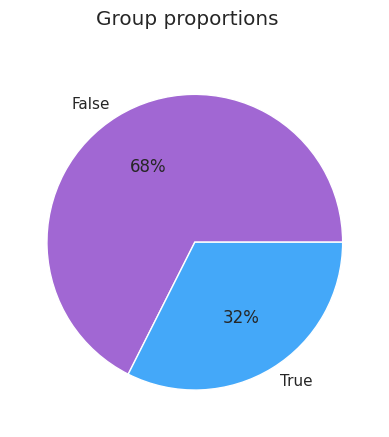

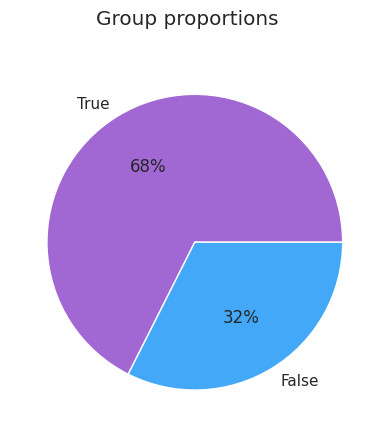

In [ ]:
group_a = data['race'].astype(bool)
group_b = ~data['race'].astype(bool)
group_pie_plot(group_a)
group_pie_plot(group_b)

In [ ]:
from holisticai.bias.metrics import classification_bias_metrics

print(group_a.shape, group_b.shape, y_pred.shape)
df = classification_bias_metrics(
    bin_cols_test.astype(bool),
    ~bin_cols_test.astype(bool),
    y_pred,
    y_test,
    metric_type='both'
)
y_baseline = y_pred.copy()
df_baseline=df.copy()
df_baseline

(53440,) (53440,) (10688,)


,Value,Reference
Metric,,
Statistical Parity,-0.082522,0
Disparate Impact,0.860609,1
Four Fifths Rule,0.860609,1
Cohen D,-0.166987,0
2SD Rule,-8.030477,0
Equality of Opportunity Difference,-0.045454,0
False Positive Rate Difference,-0.064237,0
Average Odds Difference,-0.054845,0
Accuracy Difference,0.004816,0


In [ ]:
df_rf = classification_bias_metrics(
    bin_cols_test.astype(bool),
    ~bin_cols_test.astype(bool),
    rf_pred,
    y_test,
    metric_type='both'
)
rf_baseline = rf_pred.copy()
df_rf_baseline=df_rf.copy()
df_rf_baseline

,Value,Reference
Metric,,
Statistical Parity,-0.069768,0
Disparate Impact,0.875799,1
Four Fifths Rule,0.875799,1
Cohen D,-0.140271,0
2SD Rule,-6.751692,0
Equality of Opportunity Difference,-0.033607,0
False Positive Rate Difference,-0.042183,0
Average Odds Difference,-0.037895,0
Accuracy Difference,0.001770,0


In [ ]:
df_mlp = classification_bias_metrics(
    bin_cols_test.astype(bool),
    ~bin_cols_test.astype(bool),
    mlp_pred,
    y_test,
    metric_type='both'
)
mlp_baseline = mlp_pred.copy()
df_mlp_baseline=df_mlp.copy()
df_mlp_baseline

,Value,Reference
Metric,,
Statistical Parity,-0.065945,0
Disparate Impact,0.881178,1
Four Fifths Rule,0.881178,1
Cohen D,-0.132446,0
2SD Rule,-6.376516,0
Equality of Opportunity Difference,-0.025238,0
False Positive Rate Difference,-0.045971,0
Average Odds Difference,-0.035605,0
Accuracy Difference,0.008290,0


In [ ]:
bin= ['White', 'Non-white']
df = pd.DataFrame({bin[0]: bin_cols_test.astype(bool), bin[1]: ~bin_cols_test.astype(bool)})

In [ ]:
def statistical_parity_multigroup(group_labels, y_pred):
    success_rates = {}
    for i, group in enumerate(group_labels):

        success_rates[bin[i]] = group_success_rate(group, y_pred)

    return success_rates

In [ ]:
success_rates_rf = statistical_parity_multigroup([bin_cols_test.astype(bool),~bin_cols_test.astype(bool)], y_pred)
tpr_rf = tpr_multigroup(bin, y_pred, y_test, df)
fpr_rf = fpr_multigroup(bin, y_pred, y_test, df)
print(success_rates_rf, tpr_rf, fpr_rf)

{'White': 0.509494595384166, 'Non-white': 0.5920165175498968} {'White': 0.7551605504587156, 'Non-white': 0.7561032318065566} {'White': 0.1814791796146675, 'Non-white': 0.13602550478214664}


In [ ]:
success_rates_rf = statistical_parity_multigroup([bin_cols_test.astype(bool),~bin_cols_test.astype(bool)], rf_pred)
tpr_rf = tpr_multigroup(bin, rf_pred, y_test, df)
fpr_rf = fpr_multigroup(bin, rf_pred, y_test, df)
print(success_rates_rf, tpr_rf, fpr_rf)

{'White': 0.49196611159801346, 'Non-white': 0.5617343427391603} {'White': 0.8076009501187649, 'Non-white': 0.81058564077432} {'White': 0.15475450590428838, 'Non-white': 0.12114771519659936}


In [ ]:
success_rates_rf = statistical_parity_multigroup([bin_cols_test.astype(bool),~bin_cols_test.astype(bool)], mlp_pred)
tpr_rf = tpr_multigroup(bin, mlp_pred, y_test, df)
fpr_rf = fpr_multigroup(bin, mlp_pred, y_test,df)
print(success_rates_rf, tpr_rf, fpr_rf)

{'White': 0.4890446976336547, 'Non-white': 0.5549896765313145} {'White': 0.7956989247311828, 'Non-white': 0.7963789682539683} {'White': 0.17215661901802362, 'Non-white': 0.14691817215727948}
